Here we see that small learning rate won't help!!!

In [1]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from IPython import display
%load_ext autoreload
%autoreload 2


from misc import Prob, Basics
import matplotlib.pyplot as plt
basics = Basics(dolinar_layers=2)
ats = basics.ats

def pn1(n,beta,alpha=0.4):
    p=0
    for pm in [-1,1]:
        p+=Prob(pm*alpha, beta,n)
    return p/2

def Q2(b1,n1,b2,alpha=0.4):
    p=0
    for n2 in [0,1]:
        p+=max([Prob(pm*alpha*np.cos(ats[0]), b1,n1)*Prob(pm*alpha*np.sin(ats[0]), b2,n2) for pm in [-1.,1.]])
    p/=pn1(n1,b1)
    return p/2

def Q1(b1,alpha=0.4):
    p=0
    for n1 in [0,1]:
        p+= max([Q2(b1,n1,b2,alpha) for b2 in np.arange(-1,1,.05)])*pn1(n1,b1)
    return p/2

betas = np.arange(-1,1,.05)


In [23]:
data =[]
labels=[]
labels_all=[]
for b1 in betas:
    p0 = pn1(0,b1)
    n1 = np.random.choice([0,1],p=[p0,1-p0])
    for b2 in betas:
        label1 = Q1(b1)
        label2 = Q2(b1,n1,b2)
        labels_all.append([label1,label2])
        data.append([[b1,-1.],[b2,n1]])
        labels.append([label1, label2])


labels=np.array(labels).astype(np.float32)
data_all = np.reshape(data, (len(data),2,2)).astype(np.float32)
labels_all = np.reshape(labels_all, (len(labels_all),2,1))


In [15]:
from nets import RNNC
net = RNNC()

In [21]:
preds = net(data_all[:10])

In [20]:
labs = tf.reshape(labels_all[:10], (10,2,1))
tf.losses.mean_squared_error(labs, preds)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.00731907, 0.20198196],
       [0.00731907, 0.19917485],
       [0.00731907, 0.1949095 ],
       [0.00731907, 0.18910213],
       [0.00731907, 0.181713  ],
       [0.00731907, 0.17275415],
       [0.00731907, 0.16229576],
       [0.00731907, 0.15046994],
       [0.00731907, 0.14171372],
       [0.00731907, 0.1417122 ]], dtype=float32)>

In [3]:
@tf.function
def train_step(net, data, labels):
    with tf.GradientTape() as tape:
        tape.watch(self.trainable_variables)
        preds = self(tf.convert_to_tensor(data))
        loss = tf.losses.mean_squared_error(tf.squeeze(labels),tf.squeeze(preds))
        grads = tape.gradient(loss, self.trainable_variables)
    net.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    return loss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

********
********
********
********
********
********
********
********
********
********
********
********
********
********
********
********


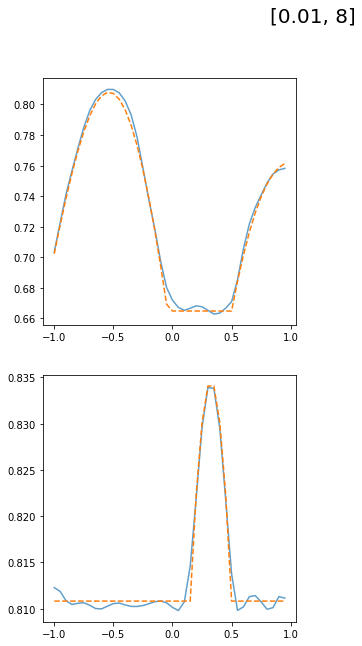

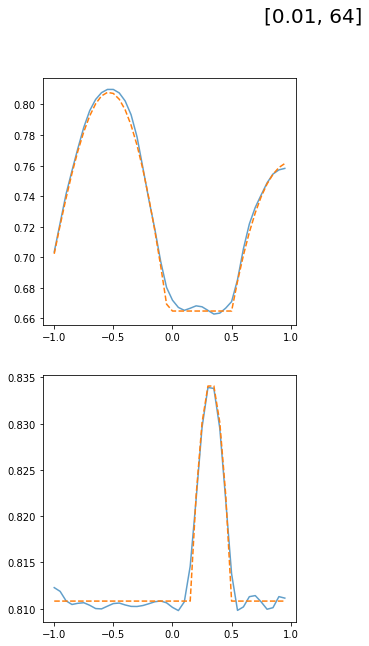

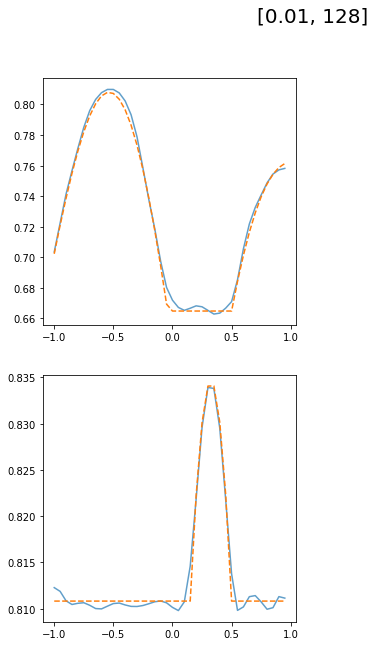

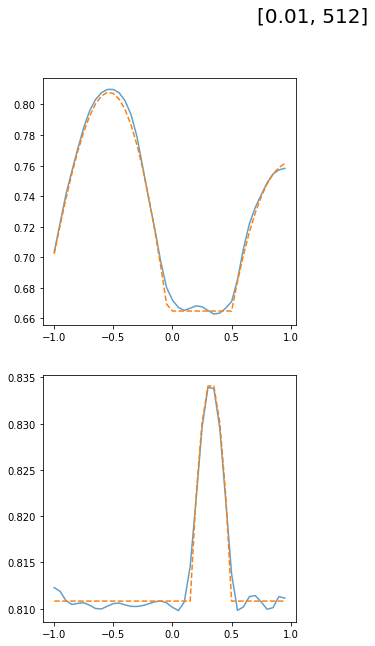

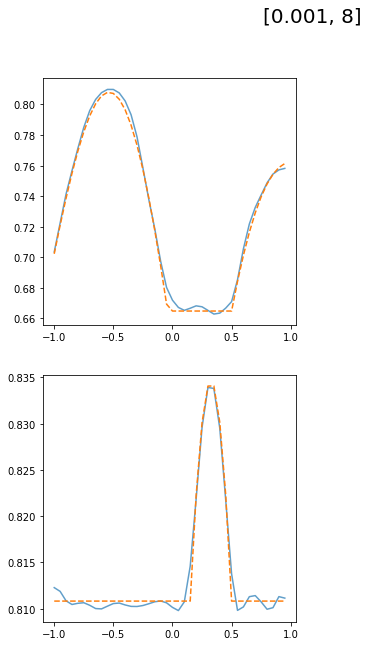

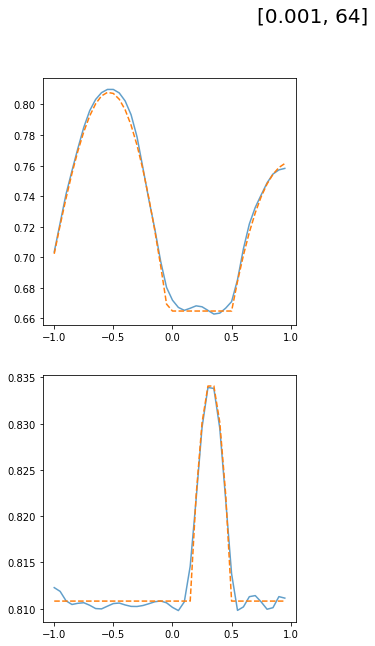

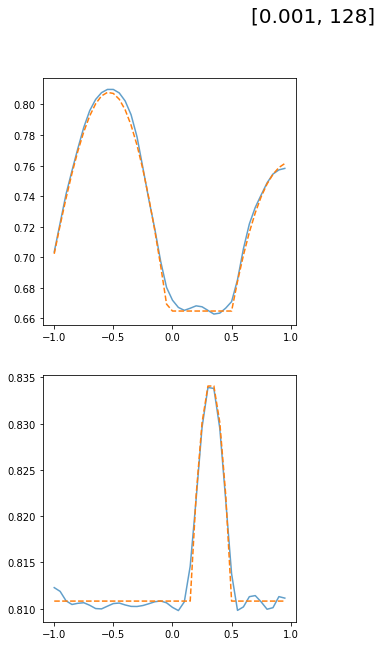

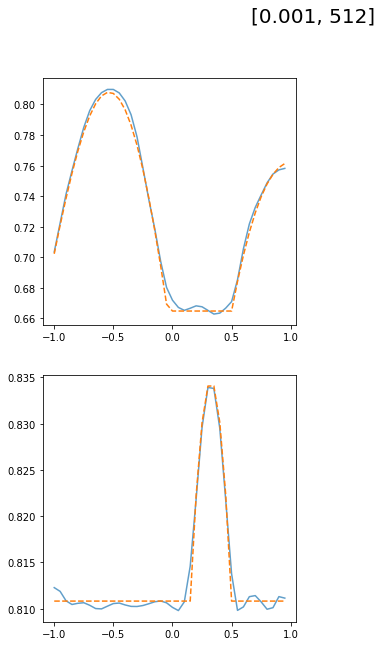

In [16]:

    b1=-.5
    plt.figure(figsize=(10,10))
    ax1=plt.subplot2grid((2,2),(0,0))
    ax2=plt.subplot2grid((2,2),(1,0))
    #ax3=plt.subplot2grid((2,2),(0,1),rowspan=2)

    plt.suptitle(vals[str(k)],size=20)
    axs = [ax1,ax2]
    data_test = {}
    for nn,ax in zip([0.,1.],axs):
        data_test[str(nn)] = []
        for b in betas:
            data_test[str(nn)].append([[b1,-1.],[b,nn]])
        ax.plot(betas, np.squeeze(net(np.reshape(data_test[str(nn)], (len(data_test[str(nn)]), 2,2)))), alpha=0.7)
        ax.plot(betas, [Q2(b1,nn,b) for b in betas], '--', label="Q2")
        #display.display(plt.gcf())
    #ax3.plot(l, color="black", linewidth=9, alpha=.8)
    #ax3.plot(range(len(lt)), lt,color="blue", linewidth=9, alpha=.8, label="globl")